# Import Packages

In [1]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import AdamW, Adam
from models.mobileViTCA import make_model
from models.PANN import Wavegram_Logmel_Cnn14
from dataset import train_set, test_set, validation_set
from vanilla_kd import VanillaKD

# Loading Models

## Teacher Model

In [2]:
teacher = Wavegram_Logmel_Cnn14()

# Loading weights from AudioSet pretrained model
state_dict = torch.load(r'C:\Users\jdcn\Desktop\PSLA\Wavegram_Logmel_Cnn14_mAP=0.439.pth')
teacher.load_state_dict(state_dict['model'])

c:\Users\jdcn\anaconda3\envs\tcc\lib\site-packages\torchlibrosa\stft.py:193: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = librosa.util.pad_center(fft_window, n_fft)


<All keys matched successfully>

In [3]:
for param in teacher.parameters():
    param.requires_grad = False

In [4]:
# Change Classifier Layer
in_features = teacher.fc_audioset.in_features

teacher.fc_audioset = nn.Linear(in_features,4)

## Student Model

In [5]:
student = make_model(net='xxs', num_classes = 4, patch_size=(4,4), patch_stride=(3,3))

## Models Hyperparams

In [12]:
# Learning Rate
Lr = 0.0001
# Optimizer
teacher_optim = Adam(teacher.parameters(), lr=Lr, weight_decay=0)
student_optim = AdamW(student.parameters(), lr=Lr, weight_decay=1e-4)

# Dataset

In [7]:
train_df = r'D:\UFPE\TCC\Train2.csv'
val_df   = r'D:\UFPE\TCC\Val2.csv'
test_df  = r'D:\UFPE\TCC\Test2.csv'

In [8]:
train_ds = train_set(train_df, r'D:\UFPE\TCC\Train2', mix_up=True)
val_ds = validation_set(val_df, r'D:\UFPE\TCC\Val2')
test_ds = test_set(test_df, r'D:\UFPE\TCC\Test2')

In [9]:
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=2, shuffle=True)

val_loader = torch.utils.data.DataLoader(val_ds, batch_size=2, shuffle=False)

test_loader = torch.utils.data.DataLoader(test_ds, batch_size=2, shuffle=False)

# Knwoledge Distillation 

In [13]:
num_epoch=10
# Distillation instance
distiller = VanillaKD(teacher, student, train_loader, test_loader, teacher_optim, student_optim) 

## Train Teacher

Training Teacher... 
Teacher Stats --> Epoch: 1 | Train Loss: 1.45, Train Accuracy: 0.11 | Validation Loss: 1.38, Validation Accuracy: 0.22
Teacher Stats --> Epoch: 2 | Train Loss: 1.44, Train Accuracy: 0.11 | Validation Loss: 1.38, Validation Accuracy: 0.22
Teacher Stats --> Epoch: 3 | Train Loss: 1.44, Train Accuracy: 0.11 | Validation Loss: 1.38, Validation Accuracy: 0.25
Teacher Stats --> Epoch: 4 | Train Loss: 1.44, Train Accuracy: 0.11 | Validation Loss: 1.38, Validation Accuracy: 0.24
Teacher Stats --> Epoch: 5 | Train Loss: 1.44, Train Accuracy: 0.11 | Validation Loss: 1.38, Validation Accuracy: 0.24
Teacher Stats --> Epoch: 6 | Train Loss: 1.44, Train Accuracy: 0.11 | Validation Loss: 1.37, Validation Accuracy: 0.27
Teacher Stats --> Epoch: 7 | Train Loss: 1.44, Train Accuracy: 0.11 | Validation Loss: 1.38, Validation Accuracy: 0.25
Teacher Stats --> Epoch: 8 | Train Loss: 1.44, Train Accuracy: 0.11 | Validation Loss: 1.38, Validation Accuracy: 0.19
Teacher Stats --> Epoch: 9 

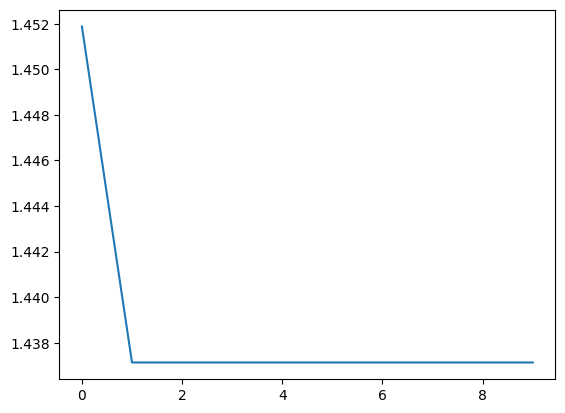

In [14]:
# Train Teacher 
distiller.train_teacher(epochs=num_epoch, plot_losses=True, save_model=True)      

## Train Student

In [ ]:
# Train Student
distiller.train_student(epochs=num_epoch, plot_losses=True, save_model=True) 

In [ ]:
distiller.get_parameters()

--------------------------------------------------------------------------------
Total parameters for the teacher network are: 85420541
Total parameters for the student network are: 1023864
